# Analysing the Iris Dataset
*by Neil Tynan @ATU*

![Iris](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Iris_latifolia-Lac_Aule-Laruns-2522~2013_07_29.JPG/1080px-Iris_latifolia-Lac_Aule-Laruns-2522~2013_07_29.JPG)

*“Image credit: Wikimedia user Clocks, CC BY-SA 3.0, https://creativecommons.org/licenses/by-sa/3.0/”*

## About the Iris Dataset
---

This notebook intends to analyse the key variables of the Iris dataset in line with the project objectives outlined in the ReadMe. However, before that, it may it be worthwhile considering the history and contents of the dataset itself.

First published in 1936, the Iris dataset is one of the earliest datasets used in the literature on classification methods.  Originally published by the UCI Machine Learning Repository, the dataset consists of 150 rows, each row representing an Iris plant. There are three major subdivisons, each representing a different species of Iris with the 150 rows being equally divided amoung these three types. These three species are:
 - Iris setosa: Characterized by its relatively small size, with distinctive characteristics in sepal and petal dimensions.
 - Iris versicolor: Moderate in size, with features falling between those of Iris setosa and Iris virginica.
 - Iris virginica: Generally larger in size, with notable differences in sepal and petal dimensions compared to the other two species.

The dataset includes further information on features related to each species flower. The are four key variables for each flower, which include:
 - Sepal Length: The length of the iris flower's sepals 
 - Sepal Width: The width of the iris flower's sepals.
 - Petal Length: The length of the iris flower's petals.
 - Petal Width: The width of the iris flower's petals.

 This dataset is often used for testing machine learning algorathims due to its simplicity, versatility and ubiquitousness. For these reasons, the dataset remains a common point of reference for many people starting to look into statistics, programming and data science.

## Import Libraries
---

In [82]:
# Load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import matplotlib.patches as patches

## Preparing the Dataset for Analysis
---

First off, we need to actually load in the iris dataset so that we can analyse it. This copy of the dataset is being pulled from sklearn, a library with a variety of datasets used for training.

In [83]:
# fetch dataset 
iris = datasets.load_iris()
df=pd.DataFrame(iris.data)
df['class']=iris.target
df.columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
df['species'] = df['species'].replace({0: 'Setosa', 1:'Versicolor', 2: 'Virginica'}, regex=True)
df.dropna(how="all", inplace=True) 



Finally, we're just going to make a few readability edits to the dataframe before we jump into the analysis.

In [84]:
# Adjusting dataframe for readibility on graphs
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
df['species'] = df['species'].replace({'Iris-setosa': 'Setosa', 'Iris-versicolor':'Versicolor', 'Iris-virginica': 'Virginica'}, regex=True)

## Histograms
---

Our first step in lookingat the data is to get an idea of how each variable is distributed. We're going to use histograms for this. We'll start off by looking at each variable in it's totality. We'll make sure to save the results for all of these histograms, as part of the third requirment for this project.

Text(0.5, 0.98, 'Iris Dataset Variables - Breakdown by Histogram')

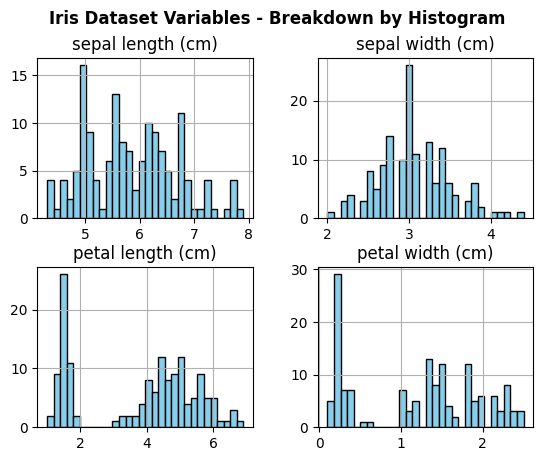

In [85]:
# Generating a histogram of the Iris dataset
df.hist(bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Iris Dataset Variables - Breakdown by Histogram', fontweight="bold")

The two petal variables look relatively similar in terms of their distributions but there's quite a bit more variables between sepal width and length. Perhaps this is just the influence of the various species of Iris' in the dataset? Let's break the histogram's down so that they also include a breakdown by species.

Text(0.5, 0.93, 'Iris Dataset Variables - Breakdown by Histogram')

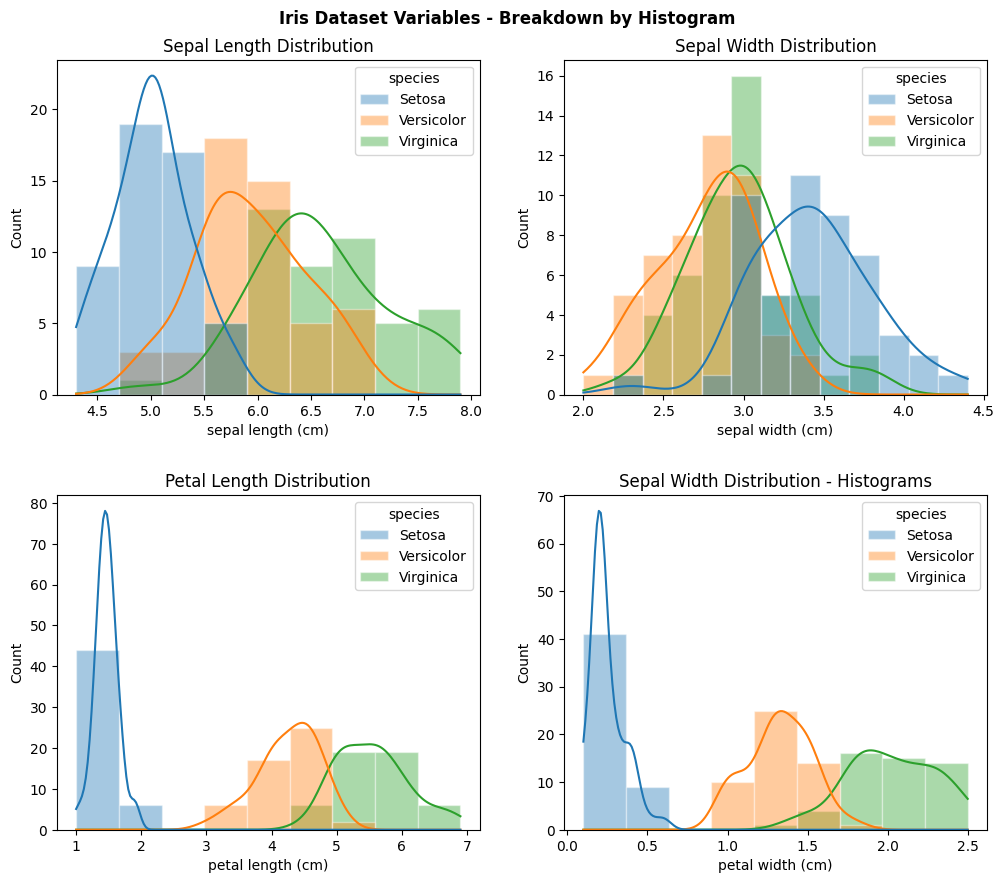

In [86]:
# Generating a histogram of the Iris dataset which includes a breakdown
fig, axes = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'hspace': 0.3})
sns.histplot(df, x="sepal length (cm)", hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[0, 0]) 
axes[0, 0].set_title('Sepal Length Distribution')
sns.histplot(df, x="sepal width (cm)", hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width Distribution')
sns.histplot(df, x="petal length (cm)",hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[1, 0])
axes[1, 0].set_title('Petal Length Distribution')
sns.histplot(df, x="petal width (cm)", hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[1, 1])
axes[1, 1].set_title('Sepal Width Distribution - Histograms')
plt.suptitle('Iris Dataset Variables - Breakdown by Histogram', fontweight="bold", y=0.93)

Interestingly, the divide is still here. When broken down by species, the distribution of the sepals' variables seems even more haphazard while each of the species has a clear alignment between the distribution of the petal variables. Additionally, now that we are looking at the breakdown by species, we can see that Versicolor and Virginica are far more likely to overlap with one another than with Setosa (especially when it comes to petals). It's clear than Setosa is generally the smallest Iris, followed by Versicolor and then Virginica.

However, it should be noted that there is a clear outlier here. Setosa, despite being the smallest Iris in all other respects, has by far the widest sepal. This disconnect is likely to have a signficant impact when we look at correlation between the variables later on.

## Scatter Plots
---

The next part of this analysis involves looking at how both pairs of variables (petals/sepals) line up with one another. For this, we will be using a scatter chart to look at the clustering of both pairs.

Text(0.5, 0.97, 'Iris Dataset Variables - Breakdown by Scatterchart')

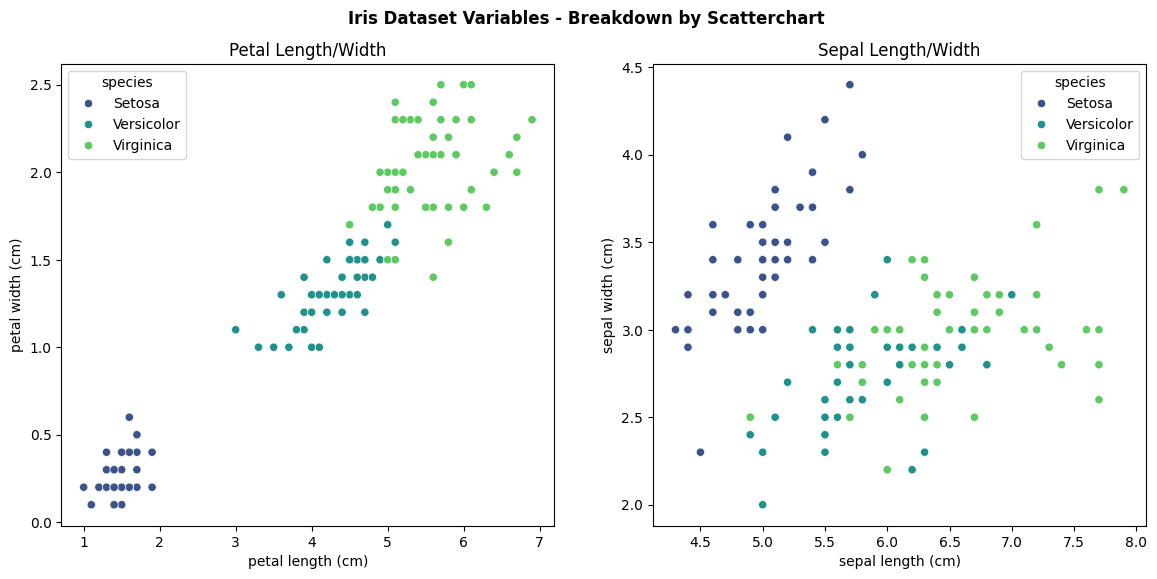

In [87]:
# create scatter plot of the petal variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'hspace': 0.3})
ax = sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', color='steelblue', hue='species', palette= 'viridis', ax=axes[0])
axes[0].set_title('Petal Length/Width')
ax = sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', color='steelblue', hue='species', palette= 'viridis', ax=axes[1])
axes[1].set_title('Sepal Length/Width')
plt.suptitle('Iris Dataset Variables - Breakdown by Scatterchart', fontweight="bold", y=0.97)

As we might have expected from what we saw in the histograms, the two pairs have very different profiles. There is a far greater linear correlation between the petal variables than the sepal ones. Again, we can also see the clear impact that the species of Iris plant has on the results. Setosa's results, yet again, tends to occupy a unique place on the graph in comparison with the other two which are more likely to cluster together. Indeed, looking at the second graph, it's clear that Setosa is the biggest culprit in disrupting the linear correlation between length and width in the sepal variables. Looking back at our histogram results, what we are clearly seeing here is the result of Setosa's usually wide Sepals.

In addition to these charts, it might also be useful to look at both sepals and petals on the same chart to see how they line up against one another.

Text(0.5, 1.0, 'Length/Width of Sepals vs Petals')

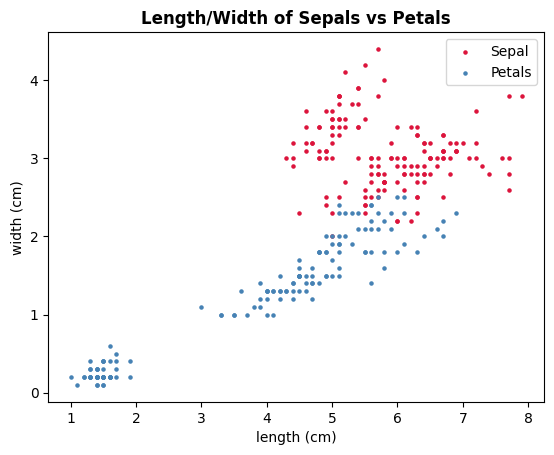

In [185]:
# create scatter plot of both pairs of variables
ax1=df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='crimson', label='Sepal', marker = ".")
ax2=df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='steelblue', label='Petals', marker = ".", ax=ax1)
ax1.set_xlabel('length (cm)')
ax1.set_ylabel('width (cm)')
ax1.set_title("Length/Width of Sepals vs Petals", fontweight="bold")


The two variables clearly occupy very distinct places in the chart and putting them next to each other further highlights how different the two are in terms of correlation. Looking at the two together pairs together Setosa's sepal results really do stand out as being the significantly one non-linear variable pair on the chart.

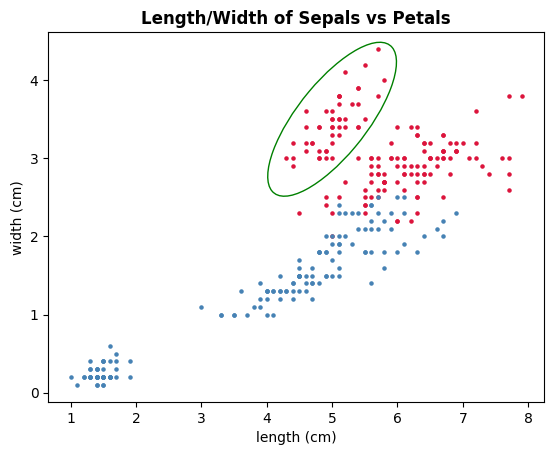

In [191]:
# highlight setosa's sepal data
ax1=df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='crimson', marker = ".")
ax2=df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='steelblue', marker = ".", ax=ax1)
ax1.set_xlabel('length (cm)')
ax1.set_ylabel('width (cm)')
ax1.set_title("Length/Width of Sepals vs Petals", fontweight="bold")
ellipse = patches.Ellipse((5, 3.5), width=2.6, height=1, angle=45, fill=False, edgecolor='green', linewidth=1)
ax1.add_patch(ellipse)

Exclude these datapoints and suddenly the overall graph starts to look a lot more linear and a lot more coherrent.

## Heatmap Correlation Analysis
---

Finally, it might be useful to look at how all the different variables correlate to one another. For this, we're going to use a heatmap. A heatmap represents the magnitude of individual values within a dataset as a color or a number. The light the number or the closer the number is to a one, the more correlated the two variables are.

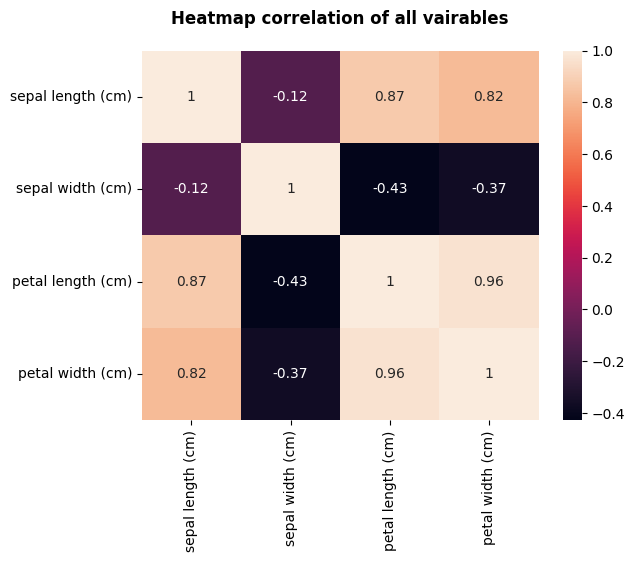

In [90]:
# create a box plot of the variables

ax = sns.heatmap((df.select_dtypes(include=['number']).corr(method='pearson')), annot = True); 
ax.set_title("Heatmap correlation of all vairables", fontweight="bold", y=1.05)
plt.show()

What we see here largely lines up with what we have seen in the scatter charts but is suprising in some other regards. Petal length and petal width are strongly correlated (not suprising given all that we've seen above). One new interesting point is that even sepal length appears to be pretty well coordinated with petal length and petal width. Clearly, the correlation effect here extends beyond just variable pairs.

## Conclusion
---

From our analysis, we can see that there is significant variation between the four key variables,though the petal variables are far more aligned in terms of distribution and correlation than the sepal ones. The key reason behind this appears to lie in the usually large width of the Septosa species of Iris who, in all other categories, is the smallest of the three species. Exclude those datapoints and the variables appears to be largely correlated. Even when it comes to non-pair variables like Sepal length and Petal width. Excluding Setosa, larger Iris generally seem to have larger petals and larger sepals.

# END